In [25]:
import os
import matplotlib.pyplot as plt
from functools import reduce
from itertools import accumulate
data_dir = "../result"
file_name = "robo.csv"

path = os.path.join(data_dir, file_name)

In [26]:
class Trade:
    def __init__(self, line):
        values = line.split(',')
        self.ts = values[1]
        self.isin_id = values[2]
        self.orderid = values[3]
        self.price = int(values[4])
        self.amount = int(values[5])
        self.dir = int(values[6])
        self.user_code = values[7]
        
    def __repr__(self):
        #return "price = {}, amount = {}, dir = {}" %(self.price, self.amount, self.dir)
        #return "price = {}".format(self.price)
        return f'price={self.price}, amount={self.amount}, dir={self.dir}'
    
class Robo:
    profit = 0.
    money = 0.
    position = 0
    trades = []
    profit_history = []
    
    def get_profit(self):
        return self.profit/1000000
    
    def read_csv(self, path):
        trades = []
        with open(path, "r") as trades_file:
            for line in trades_file:
                trade = Trade(line)
                self.trades.append(trade)
        
    def calculate_profit(self):
        self.profit_history = accumulate_profit(self, self.trades)
        
        
    
def calc_profit(robo, trade):
    if trade.dir == 1:
        robo.money -=trade.amount*trade.price
        robo.position += trade.amount
    else:
        robo.money +=trade.amount*trade.price
        robo.position -= trade.amount
    robo.profit = robo.money + trade.price * robo.position
    return robo
    
def accumulate_profit(robo, trades):
    profit = []
    for trade in trades:
        calc_profit(robo, trade)
        profit.append(robo.get_profit())
    return profit

In [27]:
robo = Robo()
robo.read_csv(path)
robo.calculate_profit()


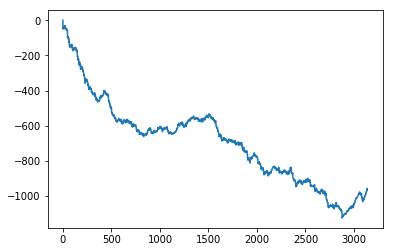

In [28]:
plt.plot(robo.profit_history)
plt.show()